# **강화학습 중간고사 시험 문제**
- 코드의 단계별로 작성하고 설명 작성하세요.
- 각각의 ipynb 파일로 제출하세요.
- 파일명 예시: **202500000 홍길동_Jack's Car rental.ipynb**

# 학번과 이름을 기입해주세요. (한글)

- 학번: 202192022
- 이름: 여명구

## **2. Jack's Car rental**

### 문제:
- 잭(Jack)은 두 곳의 렌트카 지점(A, B)을 운영하고 있음.
- 매일 밤 두 지점 간에 차량을 재배치하여 다음 날의 렌트 수익의 최대화하고 싶어함.
- **수익을 최대화하기 위해서 잭(Jack)은 어떻게 해야 하는가?**

### 조건
- 수익: 차량 1대를 렌트하면 $10의 수익이 발생합니다.

- 비용: 지점 간 차량 1대를 이동시키면 $2의 비용이 발생합니다.

- 제약
  1) 각 지점은 최대 20대의 차량만 보유할 수 있습니다. (초과분은 사라짐)
  2) 밤에 이동시킬 수 있는 차량은 최대 5대입니다.


※ 제출 내용
  1)  최적 정책 (시각화)
  2)  최적 가치 함수 (시각화)

### 문제 풀이에 필요한 추가 정보

- 뭍제 해결을 위한 '불확실성'을 정의해야 함. 기대 보상의 합을 최대화하려면 확률(P)이 필요.

- 포아송 분포의 특징
  1) Discrete한 확률분포 (손님이나 차량 수는 정수로 표현해야 함.)
  2) Non-negative (위와 마찬가지로 손님이나 차량 수는 음수가 될 수 없음.)
  3) 독립성: 오전 10시에 손님이 온 것이 오후 2시에 손님이 올 확률에 영향을 주지 않는다고 가정.
  4) 드문 사건의 발생: 불특정 다수의 고객이 올 확률이 낮음.

- $\gamma$(감가율)을 설정하여 미래의 수익이 현재의 수익보다 가치가 낮다고 가정. 이 덕분에 무한한 미래 수익이 유한한 현재 가치로 수렴하게 됨.

각 지점에서 차량이 랜덤하게 반납, 요청하는 상황을 포아송 분포로 모델링함.
- 지점 A: 평균 3대 반납, 평균 3대 요청(평균적으로 반납과 요청이 비슷하여 안정적인 경향을 보임.)
- 지점 B: 평균 4대 반납, 평균 2대 요청(B지점은 가만히 두면 차가 점점 부족해지는 경향을 보임.)

여기서 잭의 근본적인 질문은 "B 지점에 차가 2대밖에 없을 때, $6(확실한 비용)를 써서 3대를 더 가져다 놓는 것이, 내일 손님을 놓쳐서 $30(불확실한 수익)의 기회를 날리는 것보다 더 나은 선택인가?"임.

예시 상황을 생각해보자.
현재 B지점에 차량이 부족한 상황에서 그날 밤 지점 A에서 B로 차량 3대를 옮긴다고 할때 비용으로 $6이 발생.
만약 내일 B지점에서 차량을 1대라도 렌트할 수 있다면 $10의 수익이 발생.
하지만 B지점에 손님이 오지 않을 수도 있음. -> 불확실성
포아송 분포를 도입한다는 의미는 평균적으로 4명이 올 확률이 가장 높지만 3명이 올 확률도 높고, 심지어 0명이 올 확률도 존재한다는 것임.
이 모든 확률적 미래에 대해 생각 후 비용 대비 수익의 기댓값이 가장 높은 행동을 선택해야함.

왼쪽 히트맵은 441개의 모든 재고 상황(각 지점당 0~20대의 차량 보유)에 대한 최적 정책을 나타냄.
x축과 y축은 각각 지점 A와 B의 차량 수를 나타내며, 색상은 밤에 이동시킬 차량 수를 나타냄.

오른쪽 가치함수는 각 재고 상황에서의 기대 보상을 나타냄.(감가율로 인해 기대가치가 유한한 값으로 수렴함. )

🚀 사용 장치: NVIDIA A100-PCIE-40GB
⚡ GPU 텐서 계산 중... (Pre-computation)
--- Iteration 0 (Initial) ---


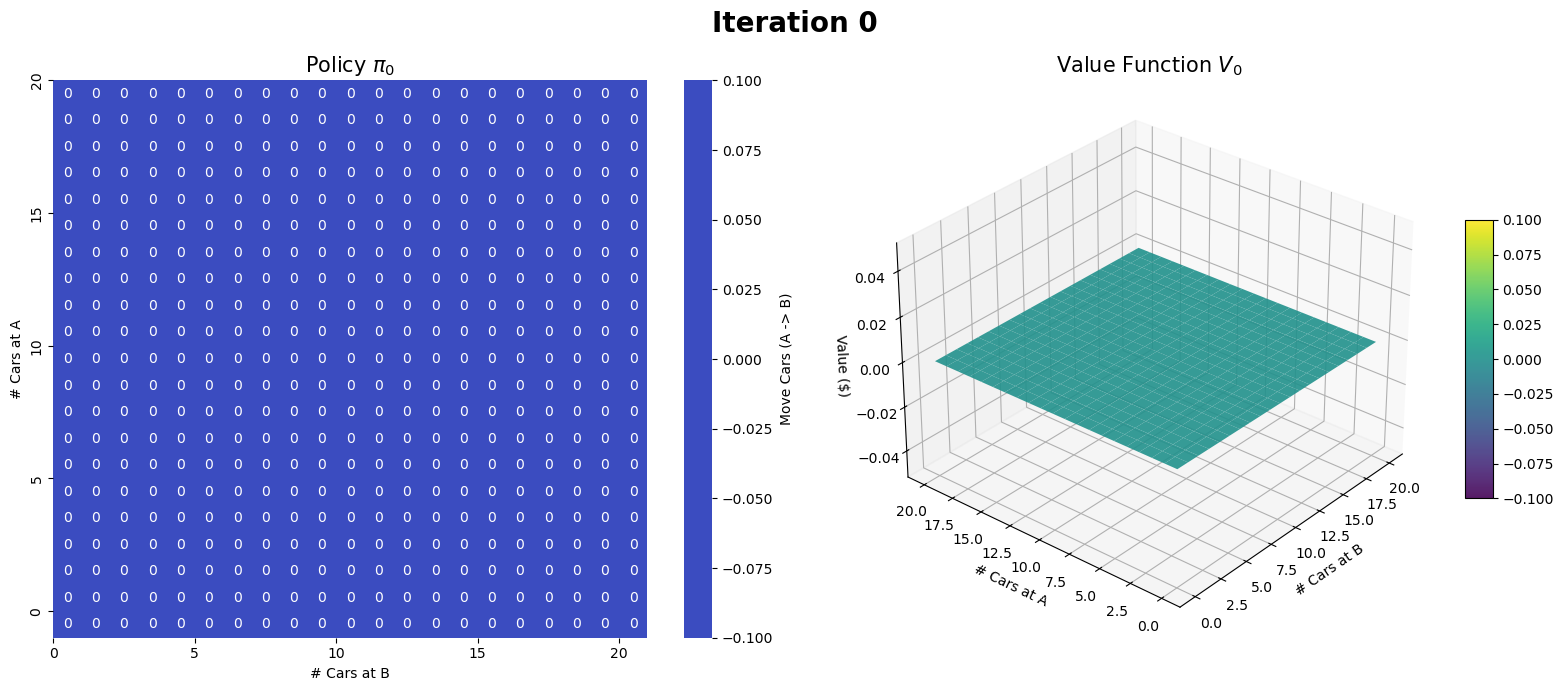


--- Iteration 1 ---
Evaluation... Done.
Improvement...

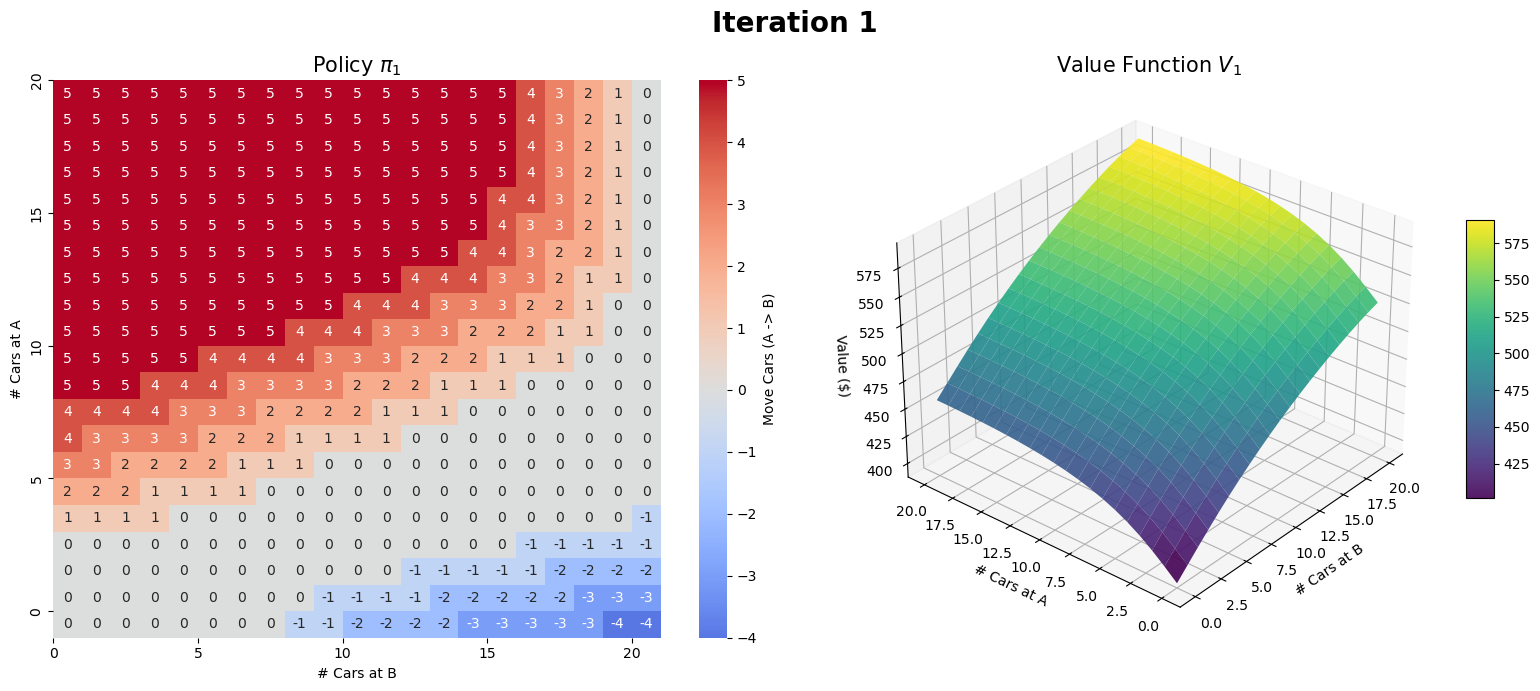

Updated.

--- Iteration 2 ---
Evaluation... Done.
Improvement...

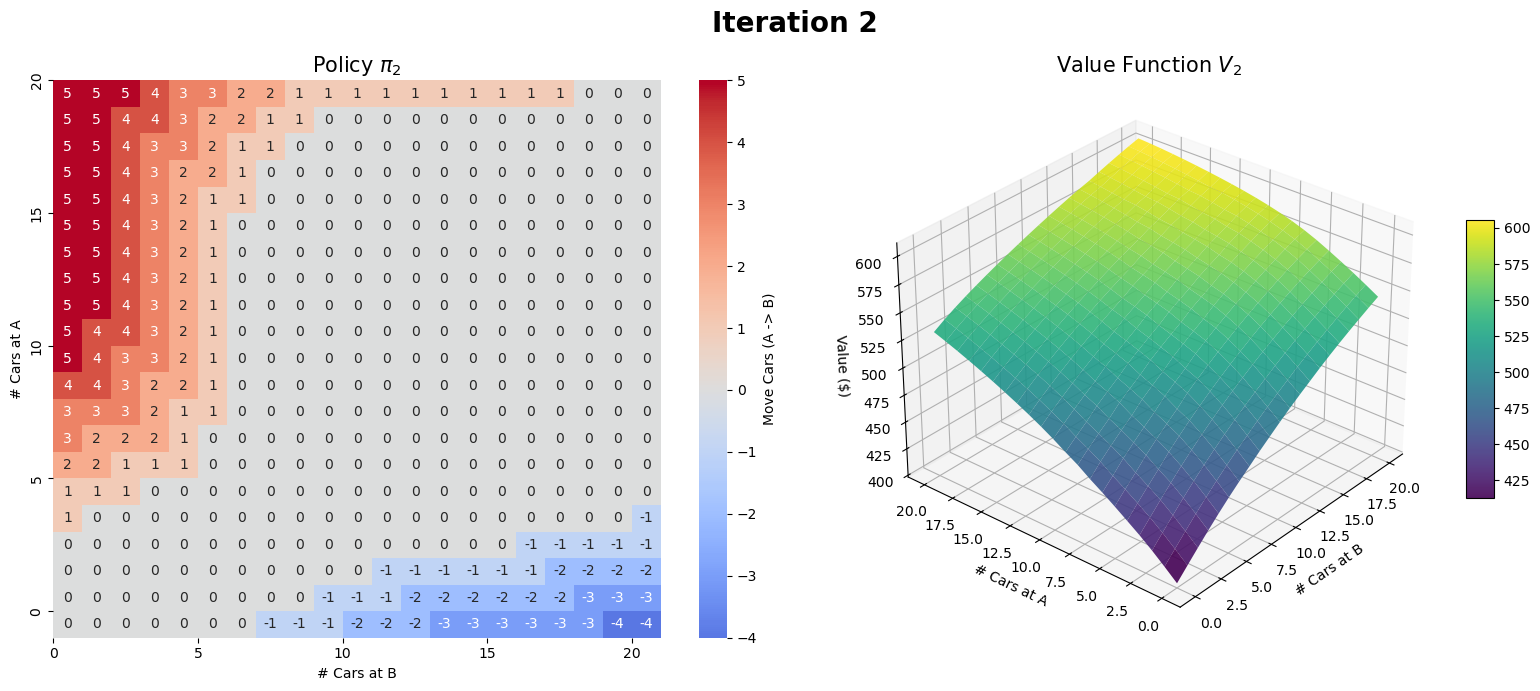

Updated.

--- Iteration 3 ---
Evaluation... Done.
Improvement...

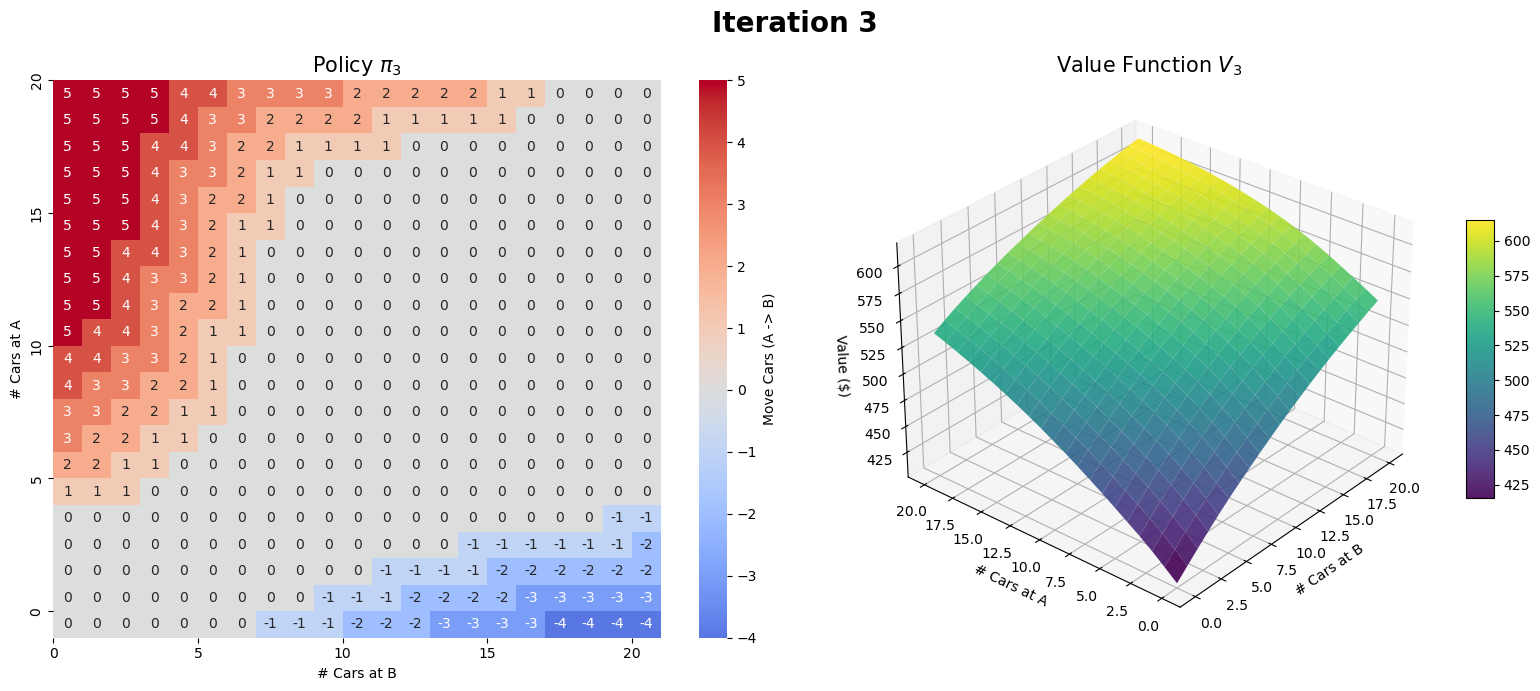

Updated.

--- Iteration 4 ---
Evaluation... Done.
Improvement...

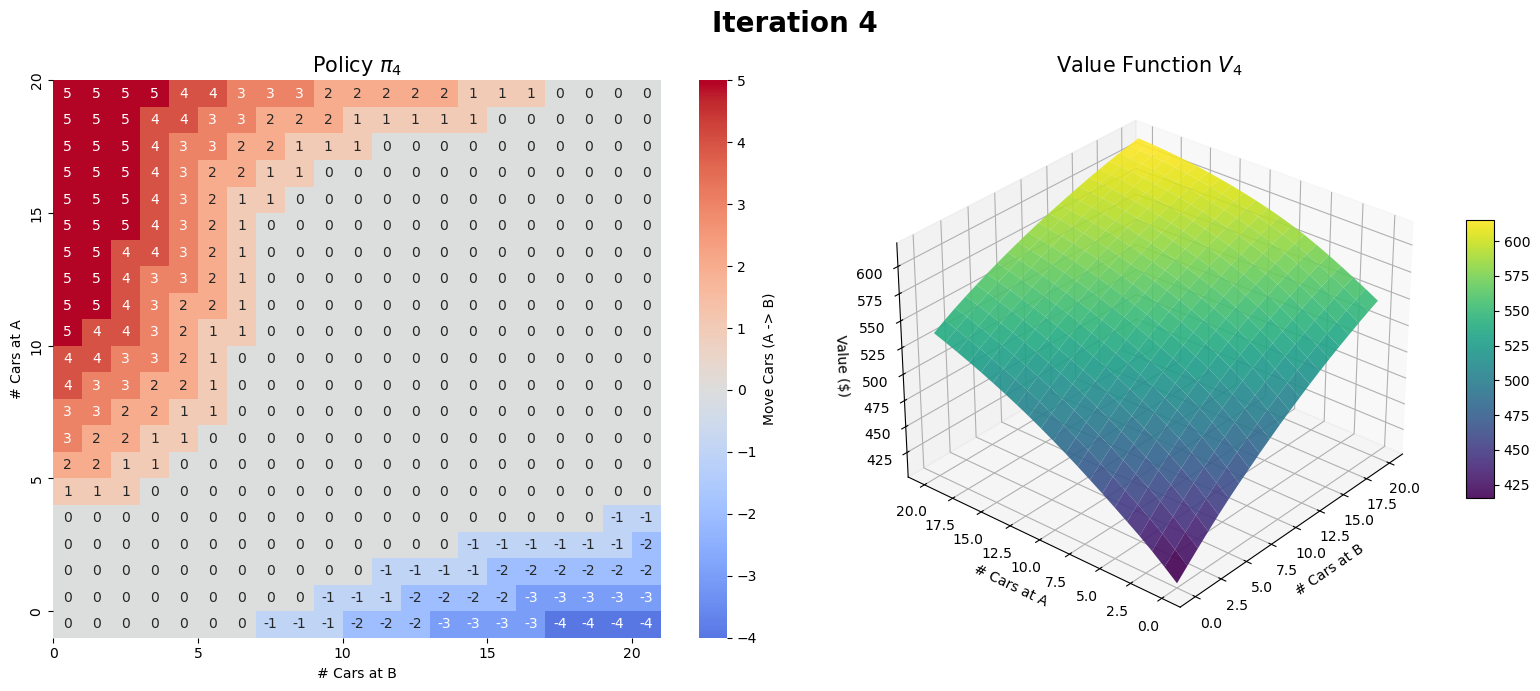

Updated.

--- Iteration 5 ---
Evaluation... Done.
Improvement...

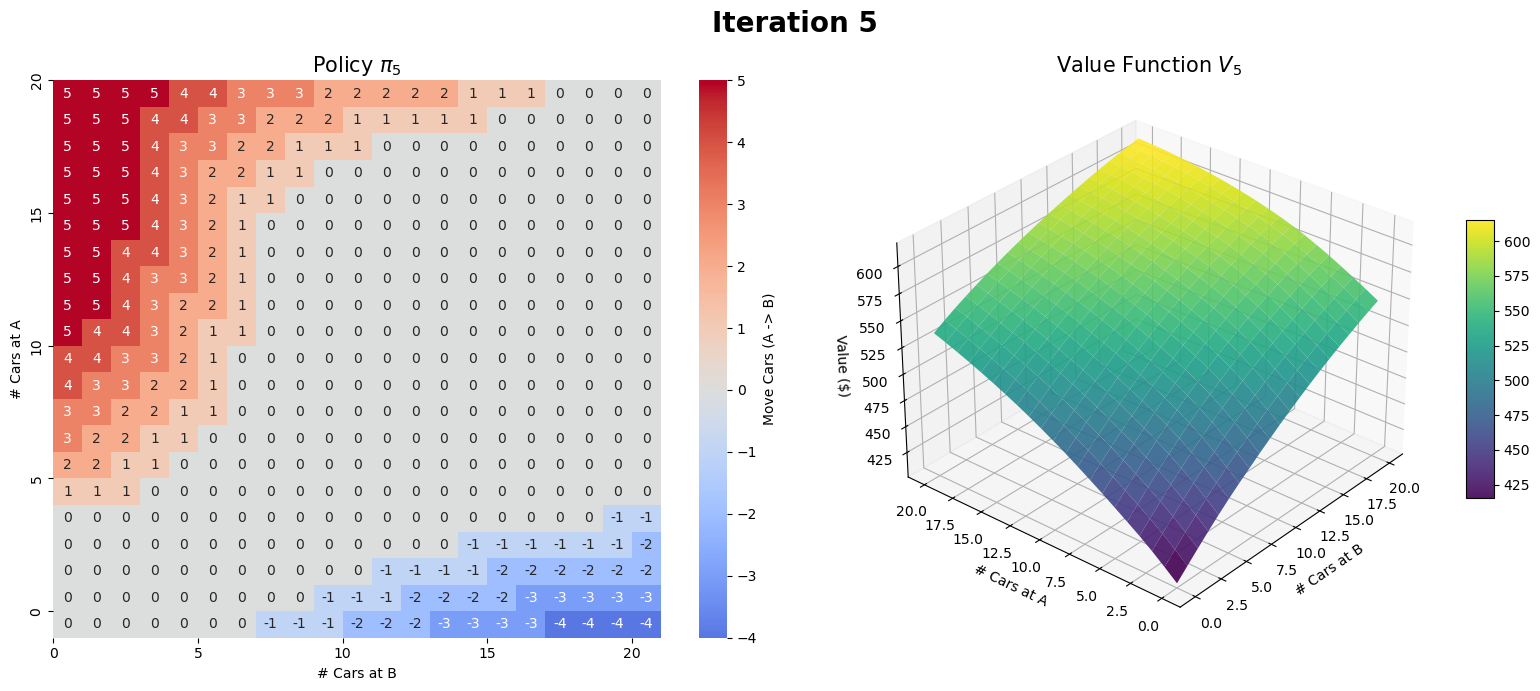

Stable! Converged. 🎉


In [ ]:
'''
잭의 렌터카 문제 (Jack's Car Rental) - GPU 가속 버전
이 코드는 강화학습의 정책 반복(Policy Iteration) 알고리즘을 사용하여
렌터카 최적 재배치 문제를 해결합니다. 
PyTorch를 사용하여 GPU 병렬 연산으로 계산 속도를 극대화했습니다.
'''

import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson

# --- 1. GPU 설정 및 상수 정의 ---
# CUDA 사용 가능 여부를 확인하고, 가능하다면 첫 번째 GPU를 사용합니다.
# A100 같은 고성능 GPU가 있다면 연산 속도가 비약적으로 빨라집니다.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"🚀 사용 장치: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'CPU'}")

# 문제의 핵심 제약 조건 및 파라미터
MAX_CARS = 20           # 각 지점이 보유할 수 있는 최대 차량 수 (초과분은 사라짐)
MAX_MOVE = 5            # 밤 사이 한 번에 이동시킬 수 있는 최대 차량 수
RENTAL_CREDIT = 10      # 차량 1대 대여 시 얻는 수익 ($10)
MOVE_COST = 2           # 차량 1대 이동 시 드는 비용 ($2)
GAMMA = 0.9             # 할인율 (미래의 보상을 현재 가치로 환산할 때 사용)

# 포아송 분포 파라미터 (Lambda: 평균 발생 횟수)
# A 지점: 대여(3), 반납(3) / B 지점: 대여(4), 반납(2)
LAMBDA_REQ_A = 3
LAMBDA_RET_A = 3
LAMBDA_REQ_B = 4
LAMBDA_RET_B = 2
POISSON_MAX = 11 # 포아송 분포 확률 계산의 상한선 (이 이상은 확률이 0에 수렴하므로 계산 제외)

# --- 2. 시각화 함수 (매 Iteration마다 호출) ---
def plot_iteration(k, policy, value):
    """
    k번째 Iteration(반복)에서의 정책(Policy)과 가치 함수(Value Function)를 시각화합니다.
    - 왼쪽: 정책 히트맵 (어떤 상태에서 몇 대를 옮겨야 하는지)
    - 오른쪽: 가치 함수 3D 플롯 (각 상태의 기대 수익이 얼마인지)
    """
    fig = plt.figure(figsize=(16, 7))
    fig.suptitle(f"Iteration {k}", fontsize=20, weight='bold')

    # [왼쪽] 정책 (Policy) 히트맵
    ax1 = fig.add_subplot(1, 2, 1)
    # np.flipud: 배열을 상하 반전시켜 (0,0) 좌표가 그래프의 좌측 하단에 오도록 조정
    sns.heatmap(np.flipud(policy), cmap='coolwarm', center=0, annot=True, fmt='d',
                cbar_kws={'label': 'Move Cars (A -> B)'}, ax=ax1)
    
    ax1.set_title(f"Policy $\pi_{k}$", fontsize=15)
    ax1.set_xlabel("# Cars at B")
    ax1.set_ylabel("# Cars at A")
    
    # Y축 레이블 수정 (위쪽이 20, 아래쪽이 0이 되도록 설정)
    ticks = np.arange(0, MAX_CARS + 1, 5)
    ax1.set_yticks(ticks)
    ax1.set_yticklabels(ticks[::-1]) 
    ax1.set_xticks(ticks)
    ax1.set_xticklabels(ticks)

    # [오른쪽] 가치 함수 (Value) 3D 플롯
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    x = np.arange(MAX_CARS + 1)
    y = np.arange(MAX_CARS + 1)
    X, Y = np.meshgrid(x, y)
    
    # Surface Plot: 가치 함수의 높낮이를 3D 지형처럼 표현
    surf = ax2.plot_surface(X, Y, value, cmap='viridis', edgecolor='none', alpha=0.9)
    
    ax2.set_title(f"Value Function $V_{k}$", fontsize=15)
    ax2.set_xlabel("# Cars at B")
    ax2.set_ylabel("# Cars at A")
    ax2.set_zlabel("Value ($)")
    ax2.view_init(elev=30, azim=220) # 보기 좋은 각도로 시점 조정
    fig.colorbar(surf, ax=ax2, shrink=0.5, aspect=10)

    plt.tight_layout()
    plt.show()

# --- 3. GPU 텐서 사전 계산 ---
def precompute_dynamics_gpu():
    """
    반복적인 계산을 피하기 위해, 모든 가능한 상태 전이 확률과 보상을
    GPU 텐서 형태로 미리 계산해 둡니다. (Pre-computation)
    이 함수 덕분에 메인 루프에서 for문을 돌지 않고 행렬 연산만으로 처리가 가능해집니다.
    """
    print("⚡ GPU 텐서 계산 중... (Pre-computation)")
    
    # 1. 포아송 확률 벡터 생성
    # 각 지점의 대여/반납 확률(0~10명이 올 확률)을 벡터로 만듭니다.
    p_req_A = torch.tensor(poisson.pmf(np.arange(POISSON_MAX), LAMBDA_REQ_A), device=device, dtype=torch.float32)
    p_ret_A = torch.tensor(poisson.pmf(np.arange(POISSON_MAX), LAMBDA_RET_A), device=device, dtype=torch.float32)
    p_req_B = torch.tensor(poisson.pmf(np.arange(POISSON_MAX), LAMBDA_REQ_B), device=device, dtype=torch.float32)
    p_ret_B = torch.tensor(poisson.pmf(np.arange(POISSON_MAX), LAMBDA_RET_B), device=device, dtype=torch.float32)

    # 2. 결합 확률 텐서 생성 (14,641개 시나리오)
    # A요청 x B요청 x A반납 x B반납 = 11^4 = 14,641가지의 모든 경우의 수에 대한 확률을 계산합니다.
    # torch.einsum을 사용하여 4개의 벡터를 외적(Outer Product)합니다. - 4가지 사건이 동시에 일어날 확률
    probs = torch.einsum('a,b,c,d->abcd', p_req_A, p_req_B, p_ret_A, p_ret_B).reshape(-1)
    
    # 시나리오별 사건 발생 횟수 (Index) 그리드 생성
    grid_req_A, grid_req_B, grid_ret_A, grid_ret_B = torch.meshgrid(
        torch.arange(POISSON_MAX, device=device),
        torch.arange(POISSON_MAX, device=device),
        torch.arange(POISSON_MAX, device=device),
        torch.arange(POISSON_MAX, device=device),
        indexing='ij'
    )
    
    # 차원 확장 (Broadcasting 준비)
    # GPU 병렬 연산을 위해 텐서의 차원을 [상태, 행동, 시나리오] 형태로 맞춥니다.
    
    # State: [441, 1, 1] -> (441개의 모든 상태)
    states_A, states_B = torch.meshgrid(
        torch.arange(MAX_CARS + 1, device=device),
        torch.arange(MAX_CARS + 1, device=device),
        indexing='ij'
    )
    s_A = states_A.reshape(-1, 1, 1)
    s_B = states_B.reshape(-1, 1, 1)
    
    # Action: [1, 11, 1] -> (-5 ~ +5 까지의 11개 행동)
    actions = torch.arange(-MAX_MOVE, MAX_MOVE + 1, device=device).view(1, -1, 1)
    
    # Scenario: [1, 1, 14641] -> (모든 확률적 사건)
    q_A = grid_req_A.reshape(1, 1, -1)
    q_B = grid_req_B.reshape(1, 1, -1)
    r_A = grid_ret_A.reshape(1, 1, -1)
    r_B = grid_ret_B.reshape(1, 1, -1)
    
    # --- 병렬 연산 (여기가 핵심입니다!) ---
    # 441(상태) x 11(행동) x 14641(시나리오) = 약 7천만 번의 계산을 한 번에 수행합니다.
    
    # 1. 아침 재고 계산 (이동 후)
    # clamp(..., 0, MAX_CARS): 차량 수는 0보다 작을 수 없고 20보다 클 수 없음
    morning_A = torch.clamp(s_A - actions, 0, MAX_CARS)
    morning_B = torch.clamp(s_B + actions, 0, MAX_CARS)
    
    # 2. 실제 대여 수 계산 (요청이 많아도 재고만큼만 빌려줌)
    real_rent_A = torch.min(morning_A, q_A)
    real_rent_B = torch.min(morning_B, q_B)
    
    # 3. 보상(Reward) 계산
    # 수익 = (대여료 * 대여 수) - (이동 비용 * 이동 수)
    rewards = (real_rent_A + real_rent_B) * RENTAL_CREDIT - torch.abs(actions) * MOVE_COST
    
    # 4. 다음 날 상태(Next State) 계산
    # 저녁 재고 = (아침 재고 - 대여) + 반납
    next_A = torch.clamp(morning_A - real_rent_A + r_A, 0, MAX_CARS)
    next_B = torch.clamp(morning_B - real_rent_B + r_B, 0, MAX_CARS)
    
    # 다음 상태를 1차원 인덱스로 변환 (V 테이블 조회를 위해)
    next_state_indices = (next_A * (MAX_CARS + 1) + next_B).long()

    # 5. 기대 보상 압축 (Reduction)
    # 시나리오 차원(dim=2)을 합쳐서 "기대 보상(Expected Reward)"을 구합니다.
    # E[R] = Sum(Reward * Probability)
    expected_rewards = (rewards * probs.view(1, 1, -1)).sum(dim=2)
    # "현재 상태가 (10, 10)이고 차를 2대 옮기면, 내일 평균적으로 얼마를 벌고(R), 어떤 확률로 어떤 상태(s')로 이동하는가?" 에 대한 답을 미리 계산.
    
    # 반환: 기대 보상 텐서, 다음 상태 인덱스 텐서, 확률 텐서
    return expected_rewards, next_state_indices, probs

# --- 4. 정책 반복 알고리즘 (시각화 포함) ---
def policy_iteration_gpu():
    # 1. 사전 계산 수행 (가장 무거운 작업)
    R_tensor, Next_Indices, Probs = precompute_dynamics_gpu()
    
    # 2. 초기화
    # 가치 함수 V: 모두 0으로 초기화
    V = torch.zeros((MAX_CARS + 1) * (MAX_CARS + 1), device=device)
    # 정책 Policy: 초기값은 '이동 안 함(0)' (인덱스 5가 0을 의미)
    policy_indices = torch.full(((MAX_CARS + 1)**2,), 5, device=device, dtype=torch.long) 
    # "처음 정책으로 차를 한대도 옮기지 않는 정책을 선택"
    actions_range = torch.arange(-MAX_MOVE, MAX_MOVE + 1, device=device)
    
    # [Iteration 0] 초기 상태 시각화
    print("--- Iteration 0 (Initial) ---")
    current_pol = actions_range[policy_indices].view(MAX_CARS+1, MAX_CARS+1).cpu().numpy()
    current_val = V.view(MAX_CARS+1, MAX_CARS+1).cpu().numpy()
    plot_iteration(0, current_pol, current_val)

    iteration = 0
    while True:
        iteration += 1
        print(f"\n--- Iteration {iteration} ---")
        
        # ==========================================
        # [STEP 1] 정책 평가 (Policy Evaluation)
        # 현재 정책을 고정하고, 그 정책의 가치(V)를 계산합니다.
        # ==========================================
        print("Evaluation...", end="")
        while True:
            # gather: 현재 정책(policy_indices)이 선택한 행동에 해당하는 값(얼마를 버는지)만 추출
            R_pi = R_tensor.gather(1, policy_indices.view(-1, 1)).squeeze()
            
            # 현재 정책대로 했을 때 다음 상태 인덱스 추출
            expanded_policy = policy_indices.view(-1, 1, 1).expand(-1, 1, Next_Indices.size(2))
            Next_S_pi = Next_Indices.gather(1, expanded_policy).squeeze()
            
            # 다음 상태의 가치 조회 (V_next)
            V_next_scenarios = V[Next_S_pi]
            
            # 기대 가치 계산: Sum(V_next * Probability, 벨만 기대 방정식)
            Expected_V_next = (V_next_scenarios * Probs).sum(dim=1)
            
            # 벨만 기대 방정식 업데이트: V = R(지금 버는 돈) + gamma(감가율) * E[V'](미래 예상 가치들의 평균)
            V_new = R_pi + GAMMA * Expected_V_next
            
            # 수렴 확인 (변화량이 매우 작으면 종료)
            if torch.max(torch.abs(V - V_new)).item() < 1e-4:
                V = V_new
                break
            V = V_new
        print(" Done.") # "내가 지금 가진 지도(정책)대로만 평생 살면, 각 칸(상태)에서 총 얼마를 벌 수 있을까?" 를 계산.
        
        # ==========================================
        # [STEP 2] 정책 개선 (Policy Improvement)
        # 계산된 V를 바탕으로 더 나은 행동을 찾아 정책을 업데이트합니다.
        # ==========================================
        print("Improvement...", end="")
        
        # 모든 가능한 행동에 대해 미래 가치(E[V']) 계산
        V_next_all = V[Next_Indices] # = 모든 행동에 대한 다음 상태들을 다 포함함
        Expected_V_next_all = (V_next_all * Probs.view(1, 1, -1)).sum(dim=2)
        
        # Q함수 계산: Q(s, a) = R(s, a)(그 행동의 즉시 보상) + gamma(감가율) * E[V'](그 행동 후의 미래 가치)
        Q_tensor = R_tensor + GAMMA * Expected_V_next_all
        
        # 불가능한 행동 마스킹 (보유 차량보다 많이 이동하는 경우 제외)
        # 예: A에 차가 2대인데 5대를 이동할 수 없음
        states_A = torch.arange(MAX_CARS + 1, device=device).repeat_interleave(MAX_CARS + 1)
        states_B = torch.arange(MAX_CARS + 1, device=device).repeat(MAX_CARS + 1)
        actions_grid = actions_range.view(1, -1)
        
        valid_mask = (states_A.view(-1, 1) >= actions_grid) & (states_B.view(-1, 1) >= -actions_grid)
        Q_tensor[~valid_mask] = -float('inf') # 불가능한 행동의 가치는 -무한대로 설정
        
        # Greedy Update: 각 상태별 Q값이 가장 높은 행동을 새로운 정책으로 선택
        new_policy_indices = torch.argmax(Q_tensor, dim=1)
        # "계산된 가치표(V)를 보고 미래 가치가 높은 정책으로 바꿈"
        
        # --- [시각화] 현재 Iteration 결과 그리기 ---
        # GPU 텐서를 CPU Numpy로 변환하여 시각화 함수 호출
        current_pol = actions_range[new_policy_indices].view(MAX_CARS+1, MAX_CARS+1).cpu().numpy()
        current_val = V.view(MAX_CARS+1, MAX_CARS+1).cpu().numpy()
        plot_iteration(iteration, current_pol, current_val)
        # ---------------------------------------

        # 정책이 더 이상 변하지 않으면(Stable) 최적 정책을 찾은 것임
        if torch.equal(new_policy_indices, policy_indices):
            print("Stable! Converged. 🎉")
            break
        else:
            print("Updated.")
            policy_indices = new_policy_indices

        # "정책을 바꿔도 바꿀게 없음 최적 정책임을 확정."

# --- 실행 ---
if __name__ == "__main__":
    policy_iteration_gpu()